## Accuracies (D6 Opening Data (Simplebot D2))

---


### x256: 0.6491
### x512: 0.6681
### x1024: 0.6734
### x2048: 0.6841


In [ ]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from connect import *
# Initialize empty lists
states = []
wdl = []

# CSV file path
file_name = 'connect4_depth2_openingsd6nostart.csv'

# Read data from CSV file
with open(file_name, 'r', newline='') as csvfile:
    reader = csv.reader(csvfile)

    # Skip header if it exists
    next(reader)  # Skip the header row

    # Read each row and append to states and wdl lists
    for row in reader:
        states.append(row[0])  # Assuming states are in the first column
        wdl.append(float(row[1]))  # Assuming wdl are in the second column and converting to float

# Function to parse board and flatten into a 1D list of 42 elements
def parse_and_flatten(state):
    board = parse_board(stdBoard(), state)
    return flatten(board)

# Create x_train by parsing and flattening each state
x_train = np.array([parse_and_flatten(state) for state in states])

# Convert y_train to numpy array and reshape for compatibility with Keras
y_train = np.array(wdl)
y_train = y_train.reshape(-1, 1)  # Reshape to (num_samples, 1)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2048)              88064     
                                                                 
 dense_3 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 90113 (352.00 KB)
Trainable params: 90113 (352.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
10695/10695 [==============================] - 64s 6ms/step - loss: 0.6587 - accuracy: 0.5125 - val_loss: 0.6352 - val_accuracy: 0.5388
Epoch 2/1000
10695/10695 [==============================] - 52s 5ms/step - loss: 0.6278 - accuracy: 0.5470 - val_loss: 0.6174 - val_accuracy: 0.5576
Epoch 3/1000
10695/10695 [==============================] - 50s 5ms/step - loss: 0.6133 - accuracy: 0.5619 - val_l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


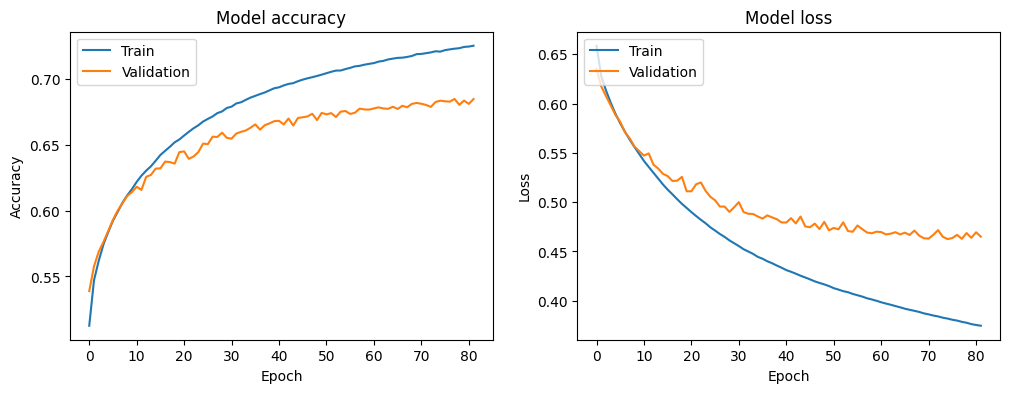

In [ ]:
import matplotlib.pyplot as plt

# Define the neural network model
model = Sequential([
    Dense(2048, activation='sigmoid', input_shape=(42,)),  # 2048 hidden nodes
    Dense(1, activation='sigmoid')  # 1 output node
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Final test loss: {loss:.4f}, test accuracy: {accuracy:.4f}')

# Save the model (optional)
model.save('connect4_2048x1_model.h5')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Best acc x64x1: 0.6711
# Best acc x128x1: 0.6948 (0.6884)
# Best acc x256x1: 0.7274 (0.7176)
# Best acc x512x1: 0.7171 (0.7094)

# D6 Opening Data
# Best acc x2048x1:
